In [1]:
import pandas            as pd # Set alias as pd for pandas
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn           as sns
import time
from   datetime          import timedelta
import getpass
from   platform          import python_version
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

In [2]:
print("\n Pandas version %s " %pd.__version__)
print("\n NumPy version %s " %np.__version__)
print("\n Matplotlib version %s " %matplotlib.__version__)
print("\n Seaborn version %s " %sns.__version__)
ver = " User: " + getpass.getuser() + " is currently using Python version: " + python_version()
print("\n Info %s" %ver)


 Pandas version 0.23.4 

 NumPy version 1.16.3 

 Matplotlib version 2.1.0 

 Seaborn version 0.8.0 

 Info  User: PVS is currently using Python version: 3.6.3


In [3]:
start_time = time.time()

In [4]:
df = pd.read_csv('D:/RRD/kaggle-titanic-master/input/train.csv', header = 0, encoding = 'latin-1')

Get the number of observations and number of columns¶

In [5]:
print("\nTotal number of observations %d Toal numbder of columns %d" %\
      (df.shape[0], df.shape[1]))


Total number of observations 891 Toal numbder of columns 12


Get column names

In [6]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Get data structure

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


Get missing values - column wise count


In [8]:
null_columns        = df.columns[df.isnull().any()]
naSummary           = df[null_columns].isnull().sum()

In [9]:
print(naSummary)

Age         177
Cabin       687
Embarked      2
dtype: int64


## Remove missing values

Drop column Cabin since the % of missing values is 77% (= 687 / 891 )

In [10]:
clean_df    = df.drop('Cabin', axis=1)
titanic_df  = clean_df.dropna()
print(titanic_df.shape)

(712, 11)


Create a column - Adult

A passenger is classified as an Adult if the age is 21 and above.

Create a function to define those who are adult (Not less

In [11]:
### Create a function to define those who are adult (Not less than 21)

def define_adult(age):
    
    try:
        
        res = 'NaN'
        
        val = float(age)

        if val < 21.0:
           res = 'Non-Adult' 
        elif val >= 21.0:
           res = 'Adult' 
        
    except:
        res = 'NaN'
        print("That's not an int!")

    return res

In [12]:
print(titanic_df[['Age']].head())

    Age
0  22.0
1  38.0
2  26.0
3  35.0
4  35.0


In [13]:
titanic_df['Adult'] = titanic_df[['Age']].apply(define_adult, axis = 1)

In [14]:
titanic_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Adult
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S,Adult
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,S,Adult
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S,Adult
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S,Adult
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S,Adult
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,Adult
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Non-Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Adult
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,Q,Adult


In [15]:
print(titanic_df['Adult'].value_counts())

Adult        532
Non-Adult    180
Name: Adult, dtype: int64


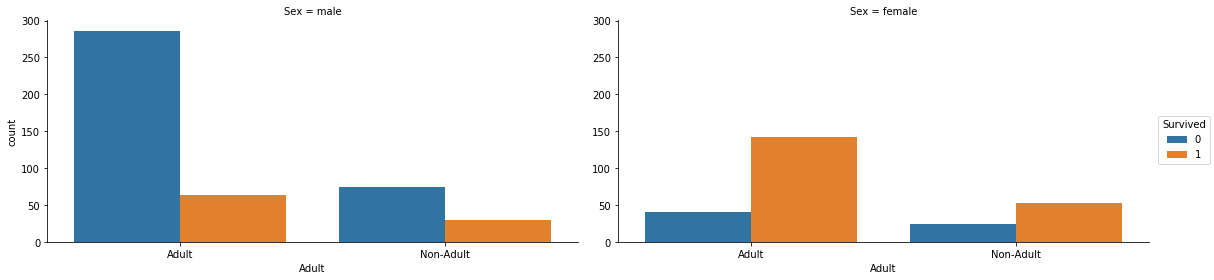

In [16]:
# Do a factorplot of passengers splitted into Survived, adult and Sex

sns.factorplot('Adult', data = titanic_df, kind = 'count', hue = 'Survived', col = 'Sex', aspect = 2);

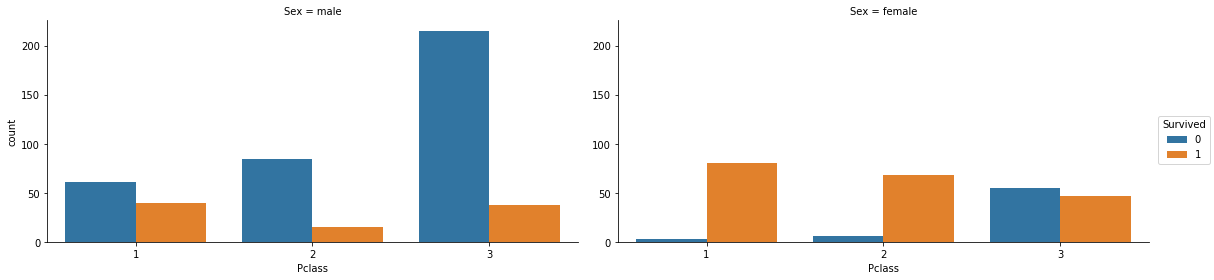

In [17]:
# Do a factorplot of passengers splitted into Survived, Pclass and Sex

sns.factorplot('Pclass', data = titanic_df, kind = 'count', hue = 'Survived', col = 'Sex', aspect = 2);

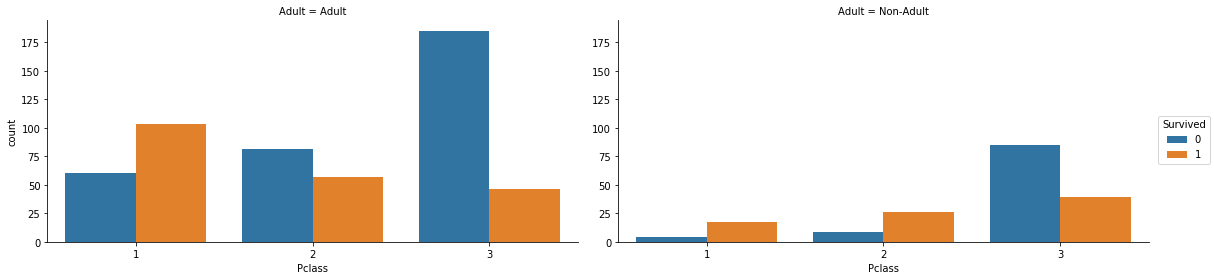

In [18]:
# Do a factorplot of passengers splitted into Survived, Pclass and Adult

sns.factorplot('Pclass', data = titanic_df, kind = 'count', hue = 'Survived', col = 'Adult', aspect = 2);

In [19]:
companion_df                           = titanic_df[(titanic_df['SibSp'] == 0) & (titanic_df['Parch']==0)]

### Add Alone column
companion_df['Travel Companion']       = 'Alone'

### Not alone data frame i.e. the passenger has either a sibling or a parent.
with_family_df          = titanic_df[(titanic_df['SibSp'] != 0) | (titanic_df['Parch']!=0)]
with_family_df['Travel Companion'] = 'With family'

Merge the above dataframes and sort by index

In [20]:
combined       = [companion_df, with_family_df ]
titanic_df     = pd.concat(combined).sort_index() ## Merge and sort by index

###  Let us do a factor plot for  Survived vs. Alone Grouped by Class 

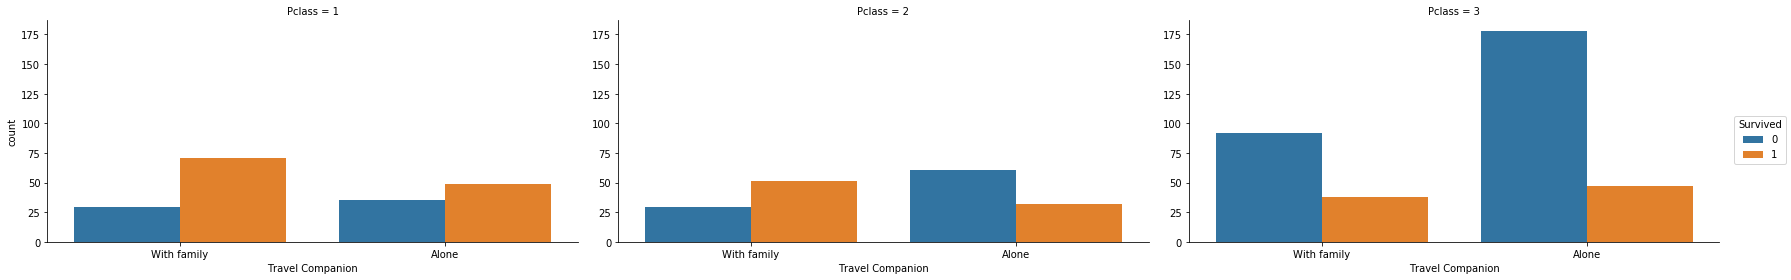

In [21]:
plt.figure(figsize=(25,12))
sns.factorplot('Travel Companion', data=titanic_df, kind = 'count', aspect = 2, hue='Survived', col='Pclass')

Text(0.5,1,'\nFirst class passengers Surivivors Vs Travel companions\n')

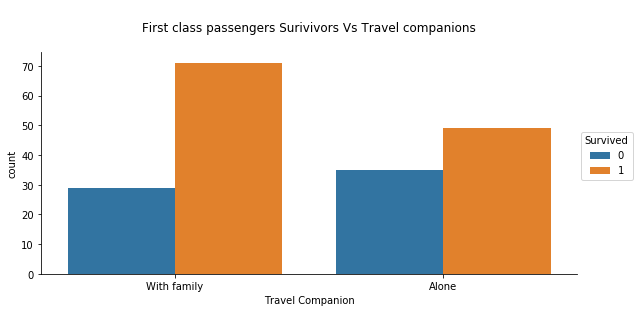

In [22]:
class1_titanic_df    =   titanic_df.loc[titanic_df['Pclass'] == 1]
sns.factorplot('Travel Companion', data = class1_titanic_df, kind = 'count', aspect = 2, hue = 'Survived', col = 'Pclass')
plt.title('\nFirst class passengers Surivivors Vs Travel companions\n')

Text(0.5,1,'\nSecond class passengers Surivivors Vs Travel companions\n')

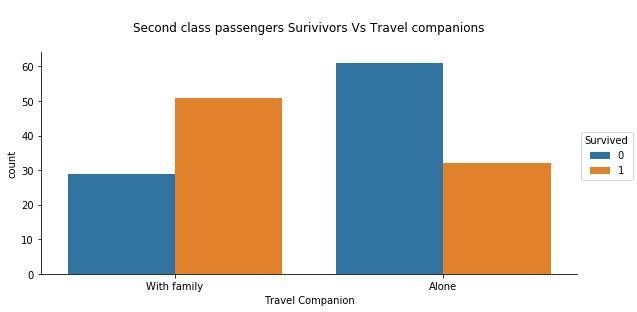

In [23]:
class2_titanic_df    =   titanic_df.loc[titanic_df['Pclass'] == 2]
sns.factorplot('Travel Companion', data = class2_titanic_df, kind = 'count', aspect = 2, hue = 'Survived', col = 'Pclass')
plt.title('\nSecond class passengers Surivivors Vs Travel companions\n')

Text(0.5,1,'\nThird class passengers Surivivors Vs Travel companions\n')

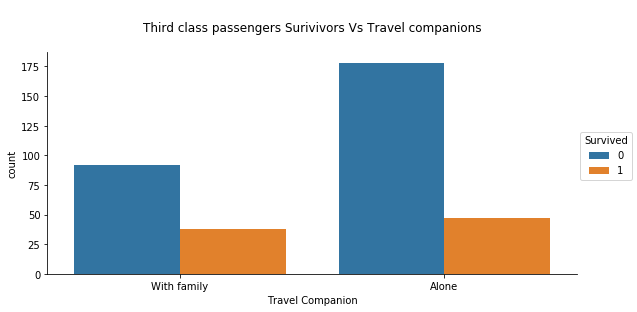

In [24]:
class3_titanic_df    =   titanic_df.loc[titanic_df['Pclass'] == 3]
sns.factorplot('Travel Companion', data = class3_titanic_df, kind = 'count', aspect = 2, hue = 'Survived', col = 'Pclass')
plt.title('\nThird class passengers Surivivors Vs Travel companions\n')

In [25]:
elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))
print("\n%s"%msg)


Execution took: 0:00:03 secs (Wall clock time)


In [ ]:
40